# Analysis functions

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from src.utilities import time_to_seconds, slc, get_average_curve
from src.modeling import model_cascade, model_one_step, model_two_step, model_three_step, residuals, fit_model
#Standardized color scheme for plotting
color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                               "#312725", '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Rate constant for R1 Nat

Fitted krep: 339588.4


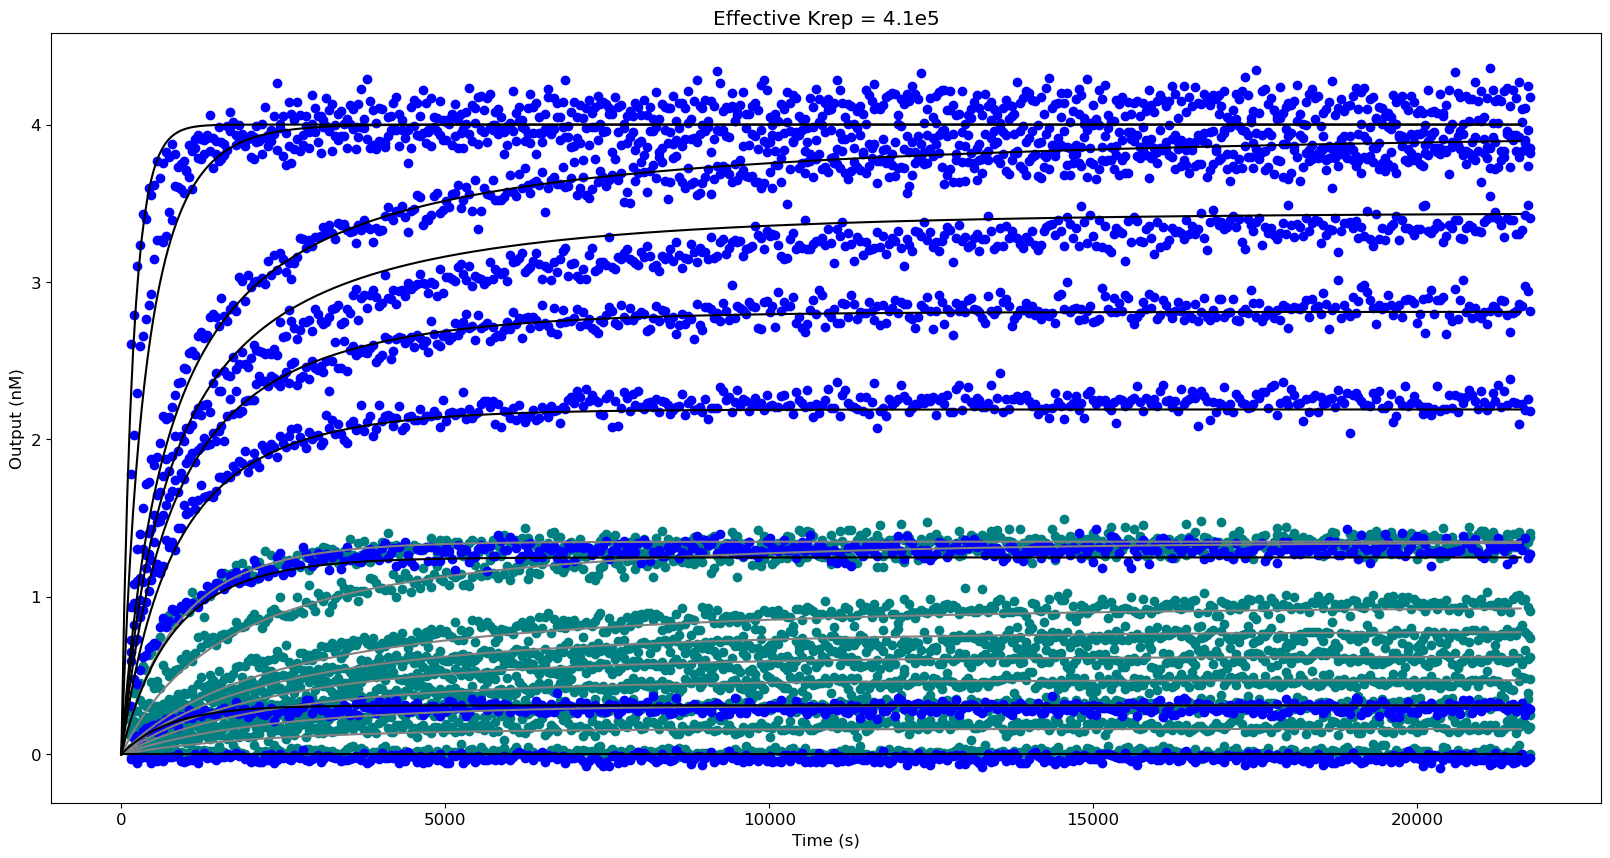

In [54]:
data_dir = "Data/"
data = pd.read_csv(data_dir + "UW_RepNat_Kinetics.csv", index_col=0)

RT = 0.593

# The below fits are to calibration curves for the two different reporter concentrations used in the experiment
fit0 = [126.85, 464.25]#intercept, slope
fit1 = [172.85, 489.88]
x = [time_to_seconds(i) for i in list(data['Time'].values)] #converted to hours
start = time_to_seconds("0:00:00")
offset = 150 #Time between tranfering protocol and first read (in seconds)



conditions = {'R1_S2_50nM: 1.25 nM' : ['B2', 'C2', 'D2'],
'F2t_S2_5nM: 0.16 nM, R1_S2_50nM: 1.25 nM' : ['C3', 'D3'],
'F2t_S2_5nM: 0.31 nM, R1_S2_50nM: 1.25 nM' : ['B4', 'C4', 'D4'],
'F2t_S2_5nM: 0.47 nM, R1_S2_50nM: 1.25 nM' : ['B5', 'C5', 'D5'],
'F2t_S2_5nM: 0.62 nM, R1_S2_50nM: 1.25 nM' : ['B6', 'C6', 'D6'],
'F2t_S2_5nM: 0.78 nM, R1_S2_50nM: 1.25 nM' : ['B7', 'C7', 'D7'],
'F2t_S2_5nM: 0.94 nM, R1_S2_50nM: 1.25 nM' : ['B8', 'C8', 'D8'],
#'F2t_S2_5nM: 1.25 nM, R1_S2_50nM: 1.25 nM' : ['B9', 'C9', 'D9'],#noted evaporation in kinetic curves
'F2t_S2_5nM: 1.87 nM, R1_S2_50nM: 1.25 nM' : ['B10', 'C10', 'D10'],
'F2t_S2_5nM: 3.75 nM, R1_S2_50nM: 1.25 nM' : ['B11', 'C11', 'D11'],
'R1_S2_50nM: 3.75 nM' : ['E2', 'F2', 'G2'],
'F2t_S2_50nM2: 0.31 nM, R1_S2_50nM: 3.75 nM' : ['E3', 'F3', 'G3'],
'F2t_S2_50nM2: 1.25 nM, R1_S2_50nM: 3.75 nM' : ['E4', 'F4', 'G4'],
'F2t_S2_50nM2: 2.19 nM, R1_S2_50nM: 3.75 nM' : ['E5', 'F5', 'G5'],
'F2t_S2_50nM2: 2.81 nM, R1_S2_50nM: 3.75 nM' : ['E6', 'F6', 'G6'],
'F2t_S2_50nM2: 3.44 nM, R1_S2_50nM: 3.75 nM' : ['E7', 'F7', 'G7'],
'F2t_S2_50nM2: 4.06 nM, R1_S2_50nM: 3.75 nM' : ['E8', 'F8', 'G8'],
#'F2t_S2_50nM2: 5.62 nM, R1_S2_50nM: 3.75 nM' : ['E9', 'F9', 'G9'],#noted evaporation in kinetic curves
'F2t_S2_50nM2: 8.75 nM, R1_S2_50nM: 3.75 nM' : ['E10', 'F10', 'G10'],
'F2t_S2_50nM2: 18.12 nM, R1_S2_50nM: 3.75 nM' : ['E11', 'F11', 'G11']
                           }

levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
for i,level in enumerate(levels):
    if i < 9:
      curves += [[get_average_curve(start, offset, level, x, data, conditions, fit0)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset, level, x, data, conditions, fit0)[1]]]]
    else:
      curves += [[get_average_curve(start, offset, level, x, data, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset, level, x, data, conditions, fit1)[1]]]]



to_fit = [c[1] for c in curves]

x_trunc = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [x/3600 for x in x_trunc]
x_h = [x/3600 for x in x]



# Initial parameters
y_init0 = [
    0.00,  # Initial concentration of Y1  (0)
    0.0,  # Initial concentration of P   (1)
    0.0,  # Initial concentration of W (2)
]

y_init1 = [
    0.0,  # Initial concentration of P   (1)
    0.16,  # Initial concentration of Y1  (0)

    0.0,  # Initial concentration of W (2)
]

y_init2 = [
    0.0,  # Initial concentration of P   (1)
    0.31,  # Initial concentration of Y1  (0)

    0.0,  # Initial concentration of W (2)
]

y_init3 = [
    0.0,  # Initial concentration of P   (1)    
    0.47,  # Initial concentration of Y1  (0)

    0.0,  # Initial concentration of W (2)
]

y_init4 = [
    0.0,  # Initial concentration of P   (1)
    0.62,  # Initial concentration of Y1  (0)

    0.0,  # Initial concentration of W (2)
]



y_init5 = [
    0.0,  # Initial concentration of P   (1)
    0.78,  # Initial concentration of Y1  (0)

    0.0,  # Initial concentration of W (2)
]

y_init6 = [
    0.0,  # Initial concentration of P   (1)
    0.94,  # Initial concentration of Y1  (0)

    0.0,  # Initial concentration of W (2)
]

y_init7 = [
    0.0,  # Initial concentration of P   (1)
    1.87,  # Initial concentration of Y1  (0)

    0.0,  # Initial concentration of W (2)
]

y_init8 = [
    0.0,  # Initial concentration of P   (1)
    3.75,  # Initial concentration of Y1  (0)

    0.0,  # Initial concentration of W (2)
]


#########

y_init9 = [
    0.0,  # Initial concentration of Y1   (0)
    0.0,  # Initial concentration of P  (1)
    0.0,  # Initial concentration of W (2)
]

y_init10 = [
    0.0,  # Initial concentration of P   (0)
    0.31,  # Initial concentration of Y1  (1)

    0.0,  # Initial concentration of W (2)
]

y_init11 = [
    0.0,  # Initial concentration of P   (0)
    1.25,  # Initial concentration of Y1  (1)

    0.0,  # Initial concentration of W (2)
]

y_init12 = [
    0.0,  # Initial concentration of P   (0)
    2.19,  # Initial concentration of Y1  (1)

    0.0,  # Initial concentration of W (2)
]

y_init13 = [
    0.0,  # Initial concentration of P   (0)
    2.81,  # Initial concentration of Y1  (1)

    0.0,  # Initial concentration of W (2)
]

y_init14 = [
    0.0,  # Initial concentration of P   (0)
    3.44,  # Initial concentration of Y1  (1)

    0.0,  # Initial concentration of W (2)
]

y_init15 = [
    0.0,  # Initial concentration of P   (0)
    4.06,  # Initial concentration of Y1  (1)

    0.0,  # Initial concentration of W (2)
]


y_init16 = [
    0.0,  # Initial concentration of P   (0)
    8.75,  # Initial concentration of Y1  (1)

    0.0,  # Initial concentration of W (2)
]

y_init17 = [
    0.0,  # Initial concentration of P   (0)
    18.12,  # Initial concentration of Y1  (1)

    0.0,  # Initial concentration of W (2)
]

cLow = 1.35
cHigh = 4.0


fixed_params_list = [
    {'y0': y_init0, 'scale':cLow},
    {'y0': y_init1, 'scale':cLow},
    {'y0': y_init2, 'scale':cLow},
    {'y0': y_init3, 'scale':cLow},
    {'y0': y_init4, 'scale':cLow},
    {'y0': y_init5, 'scale':cLow},
    {'y0': y_init6, 'scale':cLow},
    {'y0': y_init7, 'scale':cLow},
    {'y0': y_init8, 'scale':cLow},


    {'y0': y_init9, 'scale':cHigh},
    {'y0': y_init10, 'scale':cHigh},
    {'y0': y_init11, 'scale':cHigh},
    {'y0': y_init12, 'scale':cHigh},
    {'y0': y_init13, 'scale':cHigh},
    {'y0': y_init14, 'scale':cHigh},
    {'y0': y_init15, 'scale':cHigh},
    {'y0': y_init16, 'scale':cHigh},
    {'y0': y_init17, 'scale':cHigh},


]
initial_k = float(5e5)

inits = [y_init0, y_init1, y_init2, y_init3, y_init4, y_init5, y_init6, y_init7, y_init8, y_init9, y_init10, y_init11, y_init12, y_init13, y_init14, y_init15,  y_init16, y_init17]

#List of time series for fitting
x_list  = [x_trunc]*len(inits)

fitted = fit_model(model_one_step, x_list, to_fit, initial_k, fixed_params_list)
fitted_krep= fitted[0][0]
print(f"Fitted krep: {(fitted_krep):.1f}")

plt.figure(figsize=(20,10))

for i in range(len(inits)):
  if i < 9:
    plt.scatter(curves[0][0],[i*1e9 for i in curves[i][1]], color = 'teal')
    plt.plot(x,[i*1e9 for i in model_one_step(fitted_krep, x, fixed_params_list[i])], color='gray')
  else:
    plt.scatter(curves[0][0],[i*1e9 for i in curves[i][1]], color = 'blue')
    plt.plot(x,[i*1e9 for i in model_one_step(fitted_krep, x, fixed_params_list[i])], color='black')
plt.xlabel('Time (s)')
plt.ylabel('Output (nM)')
plt.title('Effective Krep = 4.1e5')
plt.show()




# Rate constant for R1nn

## No mm

Fitted kf: 1382217.0078765592
Error:  45983.80579921151



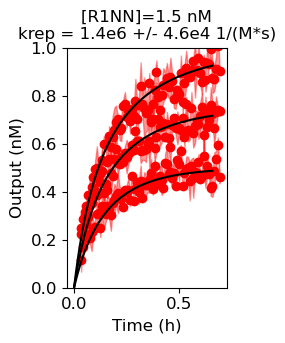

In [55]:
data1 = pd.read_csv(data_dir + "UW_RepNN_NoMM_kinetics.csv")[0:80]
data1.to_csv
RT = 0.593
offset1 = 120
conditions = {
'F2nnt_100nM: 0.5 nM, R1nn_100nM: 1.69 nM' : ['H3', 'I3', 'J3'],
'F2nnt_100nM: 0.75 nM, R1nn_100nM: 1.69 nM' : ['H4', 'I4', 'J4'],
'F2nnt_100nM: 1.0 nM, R1nn_100nM: 1.69 nM' : ['H5', 'I5', 'J5'],
              }


#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]

fit1 = [73.66, 425.42]


start = time_to_seconds("0:00:00")





levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


to_fit = [c[1] for c in curves]

x_trunc = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [i/3600 for i in x_trunc]
x_h = [i/3600 for i in x1]




#[Reporter] (nM)
scale = 1.5


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.5,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of W (2)

]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.75,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of W (2)

]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    1.00,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of W (2)
]






fixed_params_list = [
    {'y0': y_init1, 'scale':scale},
    {'y0': y_init2, 'scale':scale},
    {'y0': y_init3, 'scale':scale}]

initial_k = 4e5

inits = [y_init1, y_init2, y_init3]
x_list = [x_trunc, x_trunc, x_trunc]
fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:3])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:3], inds)
  x = slc(x_list[0:3], inds)
  fitting = slc(to_fit[0:3], inds)
  res = fit_model(model_one_step, x, fitting, initial_k, fixed)
  fits += [res[0]]

res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,len(fixed_params_list)):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h,[i*1e9 for i in model_one_step(fitted_kf, x1, fixed_params_list[i])], color='black')
    ax.scatter(x_th, curve, color = 'red')
    ax.fill_between(x_th,(curve - std),(curve + std),color = 'red', alpha = 0.4)



ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,1.0)

ax.set_title(f"[R1NN]={scale} nM\nkrep = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-4,1)}e4 1/(M*s)", fontsize=12)

#plt.savefig('R1NN_akt.svg', dpi = 600, transparent=True)
plt.show()


## Mismatch rate constant

[array([25201.79995793]), array([25256.93925974]), array([25012.84294667])]
Fitted kf: 25157.19405477963
Error:  104.52437501882311



/Users/cse-loaner/Documents/Thachuk-Lab/Projects/ThomasMayerVisit2022/NAR_Analysis_Code/src/modeling.py:38: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y1 = [i[0] for i in odeint(onestep_model, y0, t, args=(kf, scale), rtol = 1e-12, atol = 1e-12)]


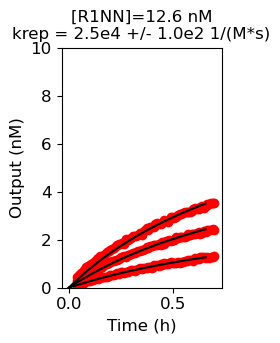

In [56]:

data1 = pd.read_csv(data_dir + "UW_RepNN_MM_Kinetics.csv")[0:80]

RT = 0.593



#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]


fit1 = [358.71, 1443.5]



start = time_to_seconds("0:00:00")
offset1 = 150


conditions = {
'F2t_1uM: 2.5 nM, R1nn_1uM: 12.69 nM' : ['E13', 'F13', 'G13'],
'F2t_1uM: 5.0 nM, R1nn_1uM: 12.69 nM' : ['E14', 'F14', 'G14'],
'F2t_1uM: 7.5 nM, R1nn_1uM: 12.69 nM' : ['E15', 'F15', 'G15'],
}





levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1]) for c in curves]
x_trunc1 = curves[0][0]

# Convert time from seconds to hours for plotting
x_th = [i/3600 for i in x_trunc1]
x_h = [i/3600 for i in x1]



dG = [-.12,-.27,-.34]
scale = 12.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    2.5,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    5.0,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    7.5,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
]



fixed_params_list = [

    {'y0': y_init1, 'scale' : scale},
    {'y0': y_init2, 'scale' : scale},
    {'y0': y_init3, 'scale' : scale}]


initial_k = 4e5

x_list = [x_trunc1, x_trunc1, x_trunc1]

fits = []
for out in range(len(fixed_params_list)):
  inds = list(range(len(fixed_params_list)))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:], inds)
  x = slc(x_list[0:], inds)
  fitting = slc(to_fit[0:], inds)
  res = fit_model(model_one_step, x, fitting, initial_k, fixed)
  fits += [res[0]]

print(fits)

fitted_kf = np.average(fits)
error = np.std(fits)



print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(0,3):
    curve = [1e9*i for i in curves[i][1]]
    ax.plot(x_h,[i*1e9 for i in model_one_step(fitted_kf, x1, fixed_params_list[i])], color='black')
    ax.scatter(x_th,curve, color = 'red')
    ax.fill_between(x_th,(np.array(curve)-np.array(stdDev[i])),np.array(curve)+np.array(stdDev[i]),color = 'red', alpha = 0.4)




ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,10)

ax.set_title(f"[R1NN]={scale} nM\nkrep = {round(fitted_kf*1e-4,1)}e4 +/- {round(error*1e-2,1)}e2 1/(M*s)", fontsize=12)

#plt.savefig('R1NNMM_akt.svg', dpi = 600, transparent=True)
plt.show()



# Natural cascade
(using reporter rate constant prepared for this project rather than previous, but only changes reported error)

### F2 Level

Fitted kf: 971539.8232326239
Error:  194997.53155944537


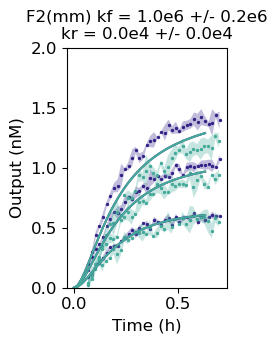

In [57]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial1.csv", index_col=0)[0:37]
data2 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial2.csv", index_col=0)[0:37]

RT = 0.592

#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]
x2 = [time_to_seconds(i) for i in list(data2['Time'].values)]

# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = time_to_seconds("0:00:00")
offset1 = 250
offset2 = 240


conditions = {'F1mmt_100nM: 0.64 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J20', 'K20', 'L20'],
'F1mmt_100nM: 1.06 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J21', 'K21', 'L21'],
'F1mmt_100nM: 1.49 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J22', 'K22', 'L22']}


levels = list(conditions.keys())
format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}


curves = []
stdDev = []

for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[1]]]]
    stdDev += [get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[2]]

to_fit = [c[1] for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[4][0]

# Convert time from seconds to hours for plotting
x_th1 = [i/3600 for i in x_trunc1]
x_h1 = [i/3600 for i in x1]
x_th2 = [i/3600 for i in x_trunc2]
x_h2 = [i/3600 for i in x2]


dG = [-9.96,-10.11,-10.19]
scale = 12

f2c1 = 2.0
f2c2 = 2.0


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.64,  # Initial concentration of F1t (2)
    f2c1,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.06,  # Initial concentration of F1t (2)
    f2c1,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.49,  # Initial concentration of F1t (2)
    f2c1,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]


y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.64,  # Initial concentration of F1t (2)
    f2c2,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init6 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.06,  # Initial concentration of F1t (2)
    f2c2,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.49,  # Initial concentration of F1t (2)
    f2c2,  # Initial concentration of F2. (5)
    0.0   # Initial concentration of W2. (10)
]

krep = 339588.4
dGi = dG[2]

fixed_params_list = [
    {'y0': y_init1, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init5, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init6, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init7, 'krep': krep,  'scale':scale, 'dG' : dGi}

]
initial_k = 2e5

inits = [y_init1, y_init2, y_init3, y_init5, y_init6, y_init7]
x_list = [x_trunc1, x_trunc1, x_trunc1, x_trunc2, x_trunc2, x_trunc2]
    
fits = []
for out in range(len(fixed_params_list)):
  inds = list(range(len(fixed_params_list)))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_model(model_two_step, x, fitting, initial_k, fixed)
  fits += [res[0]]

res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
fitted_kf = kf_mean
error = kf_se
r_error = error/(math.exp(-dGi/RT))

fitted_kr =  fitted_kf / np.exp(-dGi/(0.592))
print("Fitted kf:", fitted_kf)
print('Error: ', error)

kf2mm = fitted_kf
kr2mm = fitted_kr

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

color_scheme = ['#DDDDDD','#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499']


for i in range(0,3):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h1,[i*1e9 for i in model_two_step(fitted_kf, x1, fixed_params_list[i])], color = color_scheme[2])
    ax.scatter(x_th1,curve, color = color_scheme[2], s=2)
    ax.fill_between(x_th1,(curve - std), (curve + std), color = color_scheme[2], alpha=.3, edgecolor=None)

for i in range(3,6):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h2,[i*1e9 for i in model_two_step(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[7])
    ax.scatter(x_th2,curve, color = color_scheme[7], s=2)
    ax.fill_between(x_th2,(curve - std), (curve + std), color = color_scheme[7], alpha=.3, edgecolor=None)



ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"F2(mm) kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6\nkr = {round(fitted_kr*1e-4,1)}e4 +/- {round(r_error*1e-4,1)}e4", fontsize=12)

#plt.savefig('F2(mm)Detailed_adj.svg', dpi = 600, transparent=True)
plt.show()


### F1 level

Fitted kf: 1967369.613645994
Error:  775848.4232597279


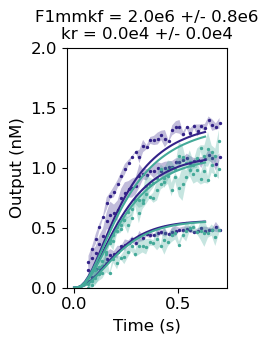

In [58]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial1.csv")[0:37]
data2 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial2.csv")[0:37]

RT = 0.593


#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]
x2 = [time_to_seconds(i) for i in list(data2['Time'].values)]


# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = time_to_seconds("0:00:00")
offset1 = 250
offset2 = 240






conditions = {
'F0mmt_100nM: 0.56 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M15', 'N15', 'O15'],
'F0mmt_100nM: 1.11 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M16', 'N16', 'O16'],
'F0mmt_100nM: 1.39 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M17', 'N17', 'O17'],
}


levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[1]]]]
    stdDev += [get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[2]]

to_fit = [c[1] for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[3][0]

# Convert time from seconds to hours for plotting
x_th1 = [i/3600 for i in x_trunc1]
x_h1 = [i/3600 for i in x1]
x_th2 = [i/3600 for i in x_trunc2]
x_h2 = [i/3600 for i in x2]

dG = [-9.96,-10.11,-10.19]

scale = 12

f2c1 = 2.0
f2c2 = 2.0

f1c1 = 2.0
f1c2 = 1.8



# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.56,  # Initial concentration of F0t (3)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.11,  # Initial concentration of F0t (3)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.39,  # Initial concentration of F0t (3)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.56,  # Initial concentration of F0t (3)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init6= [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.11,  # Initial concentration of F0t (3)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.39,  # Initial concentration of F0t (3)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]





krep = 339588.4
kf2 = kf2mm
kr2 = kr2mm
dGi = dG[1]

fixed_params_list = [

    {'y0': y_init1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2,'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dGi},

    {'y0': y_init5, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init6,'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init7, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dGi},
]
initial_k = 2e2

inits = [y_init1, y_init2, y_init3,  y_init5, y_init6, y_init7]

x_list  = [x_trunc1, x_trunc1,x_trunc1,x_trunc2,x_trunc2,x_trunc2]

fits = []
for out in range(6):
  inds = list(range(6))
  inds.remove(out)
  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_model(model_three_step, x, fitting, initial_k, fixed)
  fits += [res[0][0]]


res = np.array(fits).flatten()
kf_mean = np.mean(fits)
n = len(fits)
kf_se = np.sqrt((n - 1) / n * np.sum((fits - kf_mean)**2))
r_error = error/(math.exp(-dGi/RT))

fitted_kf = kf_mean
error = kf_se

print("Fitted kf:", fitted_kf)
print('Error: ', error)

kf1mm = fitted_kf
kr1mm = fitted_kf / np.exp(-dGi/(0.592))


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

color_scheme = ['#DDDDDD','#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499']


for i in range(0,3):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h1,[i*1e9 for i in model_three_step(fitted_kf, x1, fixed_params_list[i])], color = color_scheme[2])
    ax.scatter(x_th1,curve, color = color_scheme[2], s=2)
    ax.fill_between(x_th1,(curve - std), (curve + std), color = color_scheme[2], alpha=.3, edgecolor=None)

for i in range(3,6):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h2,[i*1e9 for i in model_three_step(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[7])
    ax.scatter(x_th2,curve, color = color_scheme[7], s=2)
    ax.fill_between(x_th2,(curve - std), (curve + std), color = color_scheme[7], alpha=.3, edgecolor=None)




ax.set_xlabel('Time (s)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"F1mmkf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6\nkr = {round(fitted_kr*1e-4,1)}e4 +/- {round(r_error*1e-4,1)}e4", fontsize=12)

#plt.savefig('F1(mm)Detailed.svg', dpi = 600, transparent=True)
plt.show()

### F0 Level

Fitted kf: 1417414.3136133307
Error:  161898.3635802866
Fitted kr: 0.07196265906069228
Error:  0.008219640953894337



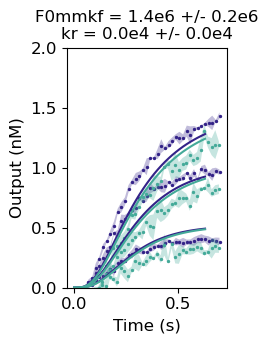

In [59]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial1.csv")[0:37]
data2 = pd.read_csv(data_dir + "UW_CascadeModel_Natural_Trial2.csv")[0:37]

RT = 0.593




#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]
x2 = [time_to_seconds(i) for i in list(data2['Time'].values)]


# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = time_to_seconds("0:00:00")
offset1 = 250
offset2 = 240





conditions = {
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 0.52 nM' : ['M20', 'N20', 'O20'],
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 1.03 nM' : ['M21', 'N21', 'O21'],
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 1.55 nM' : ['M22', 'N22', 'O22']
}


levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[1]]]]
    stdDev += [get_average_curve(start, offset1, level, x1, data1, conditions, fit1)[2]]


for i,level in enumerate(levels):
    curves += [[get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[0],[1e-9*np.array(c) for c in get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[1]]]]
    stdDev += [get_average_curve(start, offset2, level, x2, data2, conditions, fit2)[2]]

to_fit = [c[1] for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[4][0]

# Convert time from seconds to hours for plotting
x_th1 = [i/3600 for i in x_trunc1]
x_h1 = [i/3600 for i in x1]
x_th2 = [i/3600 for i in x_trunc2]
x_h2 = [i/3600 for i in x2]

dG = [-9.96,-10.11,-10.19]
scale = 12

f2c1 = 2.0
f2c2 = 2.0

f1c1 = 2.0
f1c2 = 1.8

f0c1 = 1.9
f0c2 = 1.8

# Initial parameters
y_init0 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.52,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.03,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.55,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init4 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.52,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init6 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.03,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.55,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]




krep = 339588.4


kf2 = kf2mm
kr2 = kr2mm
kf1 = kf1mm
kr1 = kr1mm

dGi = dG[0]

fixed_params_list = [
    {'y0': y_init1,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init2,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init3, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dGi},

    {'y0': y_init5,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dGi},
    {'y0': y_init6,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dGi},
    {'y0': y_init7, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dGi},
]
initial_k = 2e5


x_list  = [x_trunc1,x_trunc1,x_trunc1,x_trunc2,x_trunc2,x_trunc2]

fits = []
for out in range(6):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_model(model_cascade, x, fitting, initial_k, fixed)
  fits += [res[0]]

fitted_kf = np.average(fits)
error = np.std(fits)
fitted_kr = fitted_kf/(math.exp(-dG[0]/RT))
r_error = error/(math.exp(-dG[0]/RT))


print("Fitted kf:", fitted_kf)
print('Error: ', error)
print("Fitted kr:", fitted_kr)
print('Error: ', r_error)
print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

color_scheme = ['#DDDDDD','#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499']


for i in range(0,3):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h1,[i*1e9 for i in model_cascade(fitted_kf, x1, fixed_params_list[i])], color = color_scheme[2])
    ax.scatter(x_th1,curve, color = color_scheme[2], s=2)
    ax.fill_between(x_th1,(curve - std), (curve + std), color = color_scheme[2], alpha=.3, edgecolor=None)

for i in range(3,6):
    curve = np.array([1e9*np.array(c) for c in curves[i][1]])
    std = np.array(stdDev[i])
    ax.plot(x_h2,[i*1e9 for i in model_cascade(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[7])
    ax.scatter(x_th2,curve, color = color_scheme[7], s=2)
    ax.fill_between(x_th2,(curve - std), (curve + std), color = color_scheme[7], alpha=.3, edgecolor=None)



ax.set_xlabel('Time (s)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"F0mmkf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6\nkr = {round(fitted_kr*1e-4,1)}e4 +/- {round(r_error*1e-4,1)}e4", fontsize=12)

#plt.savefig('F0(mm)Detailed.svg', dpi = 600, transparent=True)
plt.show()


# Non-Natural Cascade

## F2 Level

Fitted kf: 3181819.4159422927
Error:  114635.38671905002



/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/1338228494.py:122: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/1338228494.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dY1dt = float(kf*F1t*F2 - dPdt)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/1338228494.py:126: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF1tdt = float(kf*F0t*F

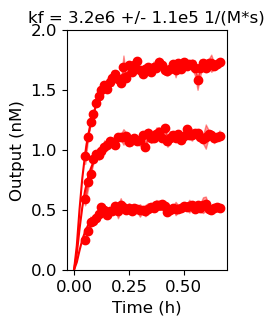

In [60]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_NN.csv")[0:50]
RT = 0.593

conditions = {
'F1nnt_200nM: 0.5 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E3', 'F3', 'G3'],
'F1nnt_200nM: 1.0 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E4', 'F4', 'G4'],
'F1nnt_200nM: 1.5 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E5', 'F5', 'G5'],
              }

# from calibration curve collected for each reporter during the same experiment
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]



fit1 =  [399.89, 1509.54]

start = time_to_seconds("0:00:00")
offset1 = 180



def get_average_curve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std






levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[0],get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]

def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, krep, scale= fixed_params['y0'], fixed_params['krep'], fixed_params['scale']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P

        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(kf*X1*F0)
        dY1dt = float(kf*F1t*F2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf*F0t*F1  - kf*F1t*F2)
        dF0tdt = float(kf*X1*F0 - kf*F0t*F1 )
        dF0dt = float(-kf*X1*F0 )
        dF1dt = float(-kf*F0t*F1)
        dF2dt = float(-kf*F1t*F2 )

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0)
        dW1dt = float(kf*F0t*F1)
        dW2dt = float(kf*F1t*F2)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf, krep, scale), rtol = 1e-12, atol = 1e-12)]
    if kf < 0:
      y1 = [-np.inf for _ in range(len(y1))]
    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)

def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out


# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""
scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6

# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.50,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.1,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.7,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

krep = 1.4e6

fixed_params_list = [
    #{'y0': y_init0, 'krep': 4.1e5, 'scale':scale, 'dG' : dG},
    {'y0': y_init1, 'krep': krep,'scale':scale},
    {'y0': y_init2, 'krep': krep,  'scale':scale},
    {'y0': y_init3, 'krep': krep,  'scale':scale},


]
initial_k = 1e6

x_list = [x_trunc1, x_trunc1, x_trunc1]
fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]

fitted_kf = np.average(fits)
error = np.std(fits)


print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


x1_var = [t/3600 for t in x1]
x_trunc1 = [t/3600 for t in x_trunc1]

for i in range(0,3):
    ax.plot(x1_var,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color='red')
    ax.scatter(x_trunc1,curves[i][1], color = 'red')
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]),color = 'red', alpha = 0.4)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = 'red', alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-5,1)}e5 1/(M*s)", fontsize=12)

#plt.savefig('F2NNDetailed.svg', dpi = 600, transparent=True)
plt.show()


## F1 level

/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/1445812732.py:119: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(- kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/1445812732.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF1tdt = float(kf*F0t*F1 - kf2*F1t*F2)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/1445812732.py:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF0tdt = float

Fitted kf: 13435754.831072638
Error:  1533933.2125680037



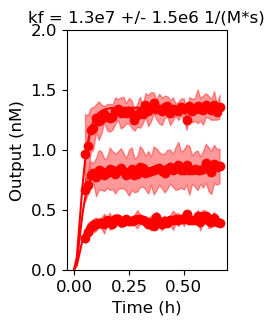

In [62]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_NN.csv")[0:50]

RT = 0.593

conditions = {
'F0nnt_200nM: 0.5 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E8', 'F8', 'G8'],
'F0nnt_200nM: 1.0 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E9', 'F9', 'G9'],
'F0nnt_200nM: 1.5 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E10', 'F10', 'G10'],
              }

# from calibration curve collected for each reporter during the same experiment
x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]


fit1 =  [399.89, 1509.54]

start = time_to_seconds("0:00:00")
offset1 = 180


def get_average_curve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std



levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[0],get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]

def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, kf2,  krep, scale = fixed_params['y0'], fixed_params['kf2'],fixed_params['krep'], fixed_params['scale']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, kf2, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P


        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(- kf*X1*F0)
        dY1dt = float(kf2*F1t*F2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf*F0t*F1 - kf2*F1t*F2)
        dF0tdt = float(kf*X1*F0- kf*F0t*F1)
        dF0dt = float(-kf*X1*F0)
        dF1dt = float(-kf*F0t*F1)
        dF2dt = float(-kf2*F1t*F2)

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0)
        dW1dt = float(kf*F0t*F1)
        dW2dt = float(kf2*F1t*F2)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf,kf2, krep, scale), rtol = 1e-12, atol = 1e-12)]
    if (kf < 0 ):
      return [np.inf]*len(y1)

    return y1


def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)
def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out

# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""
scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.42,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    0.84,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    1.35,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]




krep = 1.4e6
kf2 = 3.2e6

fixed_params_list = [
    {'y0': y_init1, 'kf2' : kf2, 'krep': krep,'scale':scale},
    {'y0': y_init2, 'kf2' : kf2,'krep': krep,  'scale':scale},
    {'y0': y_init3, 'kf2' : kf2,'krep': krep,  'scale':scale},


]
initial_k = 2e6

x_list = [x_trunc1, x_trunc1, x_trunc1]

fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]

fitted_kf = np.average(fits)
error = np.std(fits)



print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


x1_var = [t/3600 for t in x1]
x_trunc1 = [t/3600 for t in x_trunc1]
for i in range(0,3):
    ax.plot(x1_var,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color='red')
    ax.scatter(x_trunc1,curves[i][1], color = 'red')
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]),color = 'red', alpha = 0.4)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = 'red', alpha = 0.4)

ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-7,1)}e7 +/- {round(error*1e-6,1)}e6 1/(M*s)", fontsize=12)

#plt.savefig('F1(nn)Detailed.svg', dpi = 600, transparent=True)
plt.show()

## F0 Level

/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/732965275.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(- kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/732965275.py:128: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF0tdt = float(kf*X1*F0  - kf1*F0t*F1 )
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_12148/732965275.py:129: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF0dt = float(-k

Fitted kf: 2740580.574867582
Error:  35571.00505712954



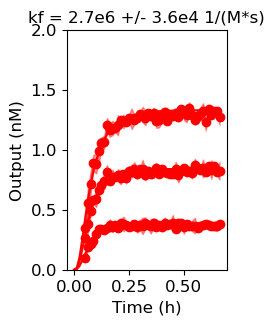

In [63]:
data1 = pd.read_csv(data_dir + "UW_CascadeModel_NN.csv")[0:50]

RT = 0.593


conditions = {
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 0.5 nM' : ['E13', 'F13', 'G13'],
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 1.0 nM' : ['E14', 'F14', 'G14'],
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 1.5 nM' : ['E15', 'F15', 'G15'],
}

x1 = [time_to_seconds(i) for i in list(data1['Time'].values)]


# from calibration curve collected for each reporter during the same experiment
fit1 =  [399.89, 1509.54]



start = time_to_seconds("0:00:00")
offset1 = 180


def get_average_curve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std




levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[0],get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [get_average_curve(start, offset1, l, x1, data1, conditions, fit1)[2]]

to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]



def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, kf1,  kf2, krep, scale = fixed_params['y0'], fixed_params['kf1'],fixed_params['kf2'],fixed_params['krep'], fixed_params['scale']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, kf1, kf2, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P

        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(- kf*X1*F0)
        dY1dt = float(kf2*F1t*F2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf1*F0t*F1  - kf2*F1t*F2 )
        dF0tdt = float(kf*X1*F0  - kf1*F0t*F1 )
        dF0dt = float(-kf*X1*F0 )
        dF1dt = float(-kf1*F0t*F1 )
        dF2dt = float(-kf2*F1t*F2 )

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0 )
        dW1dt = float(kf1*F0t*F1 )
        dW2dt = float(kf2*F1t*F2 )

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf,kf1, kf2, krep, scale), rtol = 1e-12, atol = 1e-12)]
    if (kf < 0 ):
      return [np.inf]*len(y1)

    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)
def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out


# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""




scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.37,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.84,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.33,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]






krep = 1.4e6
kf2 = 3.2e6
kf1 = 1.3e7

fixed_params_list = [
    {'y0': y_init1,'kf1' : kf1,  'kf2' : kf2,  'krep': krep,'scale':scale},
    {'y0': y_init2,'kf1' : kf1,  'kf2' : kf2,  'krep': krep,  'scale':scale},
    {'y0': y_init3, 'kf1' : kf1,  'kf2' : kf2, 'krep': krep,  'scale':scale},

]




x_list  = [x_trunc1,x_trunc1,x_trunc1]

fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]


fitted_kf = np.average(fits)
error = np.std(fits)



print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
x1_var = [t/3600 for t in x1]
x_trunc1 = [t/3600 for t in x_trunc1]
for i in range(0,3):
    ax.plot(x1_var,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color='red')
    ax.scatter(x_trunc1,curves[i][1], color = 'red')
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]),color = 'red', alpha = 0.4)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = 'red', alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-4,1)}e4 1/(M*s)", fontsize=12)

#plt.savefig('F0NNDetailed.svg', dpi = 600, transparent=True)
plt.show()
